
# **Tensors**

Tensors are a data structure that are very similar to arrays
and matrices. 
The tensor is PyTorch's basic building block and similar to numpy's ndarray



In [ ]:
import torch
import numpy as np

Tensor Initialization
------------------------------------

Tensors can be initialized in various ways. Take a look at the following examples:

In [ ]:
# Directly from data
x_tensor = torch.tensor([1, 2, 3, 4])
print(x_tensor)

tensor([1, 2, 3, 4])


In [ ]:
# From a numPy array
np_array = np.array([0.1, 0.2, 0.3])
x_tensor = torch.from_numpy(np_array)
print(x_tensor)
# (To numpy array)
x_tensor.numpy()

tensor([0.1000, 0.2000, 0.3000], dtype=torch.float64)


array([0.1, 0.2, 0.3])

In [ ]:
# From another tensor:
## The new tensor retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden.
x_ones = torch.ones_like(x_tensor) # retains the properties of x_tensor
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_tensor, dtype=torch.float) # overrides the datatype of x_tensor
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([1., 1., 1.], dtype=torch.float64) 

Random Tensor: 
 tensor([0.7380, 0.2565, 0.4213]) 



In [ ]:
# With random or constant values:

# Need to determine the dimensionality of the output tensor.
rand_tensor = torch.rand((3, 2, 2)) # Returns a tensor filled with random numbers from a uniform distribution on the interval
ones_tensor = torch.ones((2, 5))  # Returns a tensor filled with the scalar value 1
zeros_tensor = torch.zeros((2)) # Returns a tensor filled with the scalar value 0

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[[0.9908, 0.5969],
         [0.8770, 0.1183]],

        [[0.4594, 0.8105],
         [0.4706, 0.1099]],

        [[0.4889, 0.2492],
         [0.7532, 0.4352]]]) 

Ones Tensor: 
 tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]) 

Zeros Tensor: 
 tensor([0., 0.])


--------------




Tensor Attributes
--------
Tensor attributes describe their shape, datatype, and the device on which they are stored.



In [ ]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}") 
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


--------------




Tensor Operations
---------------------------
Tensors can conduct many operations. Take a look at the following examples:

In [ ]:
a = torch.tensor([1, 2])
b = torch.tensor([3, 4])

# Basic Operation

# addition
c = a + b
print(c)
c = torch.add(a, b)
print(c)

# substraction
c = a - b
print(c)
c = torch.sub(a, b)
print(c)

# multiplication
c = a * b
print(c)
c = torch.mul(a,b)
print(c)

# division
c = a / b
print(c)
c = torch.div(a, b)
print(c)

tensor([4, 6])
tensor([4, 6])
tensor([-2, -2])
tensor([-2, -2])
tensor([3, 8])
tensor([3, 8])
tensor([0.3333, 0.5000])
tensor([0.3333, 0.5000])


In [ ]:
# Tensor Reshape

# "MNIST"
N, C, W, H = 10000, 3, 28, 28
X = torch.randn((N, C, W, H)) # Returns a tensor filled with random numbers from a normal distribution with mean 0 and variance 1 (also called the standard normal distribution).

print(X.shape)
print(X.view(N, C, 784).shape) # Returns a new tensor with the same data as the self tensor but of a different shape.
print(X.view(-1, C, 784).shape) # automatically choose the 0th dimension

torch.Size([10000, 3, 28, 28])
torch.Size([10000, 3, 784])
torch.Size([10000, 3, 784])


In [ ]:
# by default all tensors are created on the CPU,
# but you can also move them to the GPU (only if it's available )
if torch.cuda.is_available():
    device = torch.device("cuda")          # Default CUDA device
    
  
    y = torch.ones_like(x_tensor, device=device)  # directly create a tensor on GPU
    print("y = ",y)

    x = x_tensor.to(device)
    print("x = ", x)
                           # or just use strings ``.to("cuda")``
    z = x + y
    print("z = ", z)
    # move to CPU again
    z.to("cpu")       # ``.to`` can also change dtype together!
    print(z)


y =  tensor([1., 1., 1.], device='cuda:0', dtype=torch.float64)
tensor([0.1000, 0.2000, 0.3000], device='cuda:0', dtype=torch.float64)
tensor([1.1000, 1.2000, 1.3000], device='cuda:0', dtype=torch.float64)
tensor([1.1000, 1.2000, 1.3000], device='cuda:0', dtype=torch.float64)


[Broadcasting semantic](https://pytorch.org/docs/stable/notes/broadcasting.html): PyTorch operations support NumPy Broadcasting Semantics.

[Operations](https://pytorch.org/docs/stable/torch.html) Try out some of the operations from the list.


**Computation graphs**
---------------------

What's special about PyTorch's ```tensor``` object is that it implicitly creates a computation graph in the background. A computation graph is a a way of writing a mathematical expression as a graph. There is an algorithm to compute the gradients of all the variables of a computation graph in time on the same order it is to compute the function itself.

**Example**: 
Consider the expression $e=(a+b)*(b+1)$ with values $a=2, b=1$. We can draw the evaluated computation graph as:

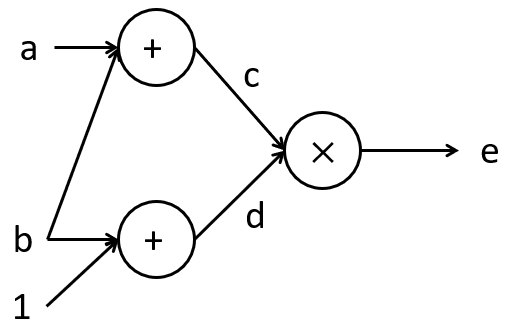

In PyTorch, we can write this as

In [ ]:
a = torch.tensor(2.0, requires_grad=True) # we set requires_grad=True to let PyTorch know to keep the graph 
b = torch.tensor(1.0, requires_grad=True)
c = a + b
d = b + 1
e = c * d
print('c', c)
print('d', d)
print('e', e)

c tensor(3., grad_fn=<AddBackward0>)
d tensor(2., grad_fn=<AddBackward0>)
e tensor(6., grad_fn=<MulBackward0>)


We can see that PyTorch kept track of the computation graph for us.

[How Computational Graphs are Constructed in PyTorch](https://pytorch.org/blog/computational-graphs-constructed-in-pytorch/)

------------------------

# **Auto Grad**

The autograd package provides automatic differentiation for all operations on Tensors.


**Example:** Consider the function $f(x) = (x-2)^2$.

Q: Compute $\frac{d}{dx} f(x)$ and then compute $f'(1)$.

We make a `backward()` call on the leaf variable (`y`) in the computation, computing all the gradients of `y` at once.

In [ ]:
def f(x):
    return (x-2)**2

def fp(x):
    return 2*(x-2)


# requires_grad = True -> tracks all operations on the tensor. 
x = torch.tensor([1.0], requires_grad=True)

y = f(x)
y.backward() # Computes the sum of gradients of given tensors (y) with respect to graph leaves (x).
#bakward is derivative

print('Analytical f\'(x):', fp(x))
print('PyTorch\'s f\'(x):', x.grad) # Computes and returns gradient

Analytical f'(x): tensor([-2.], grad_fn=<MulBackward0>)
PyTorch's f'(x): tensor([-2.])


It can also find gradients of functions.

Let $w = [w_0, w_1]^T$ (vector)

Consider $g(w) = 2w_0w_1 + w_1\cos(w_0)$

Q: Compute $\nabla_w g(w)$ and verify $\nabla_w g([\pi,1]) = [2, \pi - 1]^T$

In [ ]:
def g(w):
    return 2*w[0]*w[1] + w[1]*torch.cos(w[0])

def grad_g(w):
    return torch.tensor([2*w[1] - w[1]*torch.sin(w[0]), 2*w[0] + torch.cos(w[0])])
    # derivation with of respect w0; and derivation with respect w1


w = torch.tensor([np.pi, 1], requires_grad=True)
# to give values of w0 and w1; and keep track of the computation graph 

z = g(w)
z.backward() # Computes the sum of gradients of given tensors z with respect to graph leaves (w0, w1).

print('Analytical grad g(w)', grad_g(w))
print('PyTorch\'s grad g(w)', w.grad) # Computes and returns the sum of gradients of outputs (g'(w0), g'(w1)) with respect to the inputs (w0,w1).

Analytical grad g(w) tensor([2.0000, 5.2832])
PyTorch's grad g(w) tensor([2.0000, 5.2832])


**Using the gradient descent**
------------------------------------------

Now that we have gradients, we can use gradient descent (a optimization algorithm) for finding a local minimum of a differentiable function.

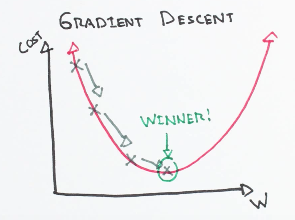

Let $f$ the same function we defined above. ( $f(x) = (x-2)^2$)

Q: What is the value of $x$ that minimizes $f$?

Solutions: During iterations,

> Step1: Compute $f'(x)$

> Step2: Update x. x_new = x_old - step_size * f'(x_old)





In [ ]:
x = torch.tensor([5.0], requires_grad=True)
step_size = 0.25

print('iter,\tx,\tf(x),\tf\'(x),\tf\'(x) pytorch')
for i in range(15):
    y = f(x)
    y.backward() # compute the gradient
    
    print('{},\t{:.3f},\t{:.3f},\t{:.3f},\t{:.3f}'.format(i, x.item(), f(x).item(), fp(x).item(), x.grad.item()))
    
    x.data = x.data - step_size * x.grad 
    # gradient descent uptade rule
      
    x.grad.zero_()

    # We need to set the gradients of x to zero. 
    # If not, the gradient would be a combination of the old gradient, which have already been used to update the model parameters, and the newly-computed gradient. 
    # It would therefore point in some other direction than the intended direction towards the minimum (or maximum, in case of maximization objectives).

    #x.grad.zero_()

iter,	x,	f(x),	f'(x),	f'(x) pytorch
0,	5.000,	9.000,	6.000,	6.000
1,	3.500,	2.250,	3.000,	3.000
2,	2.750,	0.562,	1.500,	1.500
3,	2.375,	0.141,	0.750,	0.750
4,	2.188,	0.035,	0.375,	0.375
5,	2.094,	0.009,	0.188,	0.188
6,	2.047,	0.002,	0.094,	0.094
7,	2.023,	0.001,	0.047,	0.047
8,	2.012,	0.000,	0.023,	0.023
9,	2.006,	0.000,	0.012,	0.012
10,	2.003,	0.000,	0.006,	0.006
11,	2.001,	0.000,	0.003,	0.003
12,	2.001,	0.000,	0.001,	0.001
13,	2.000,	0.000,	0.001,	0.001
14,	2.000,	0.000,	0.000,	0.000


**Backpropagation (BP)**
----------------------------------------
Four steps:

1) Forward pass: Compute Loss

2) Compute local gradients

3) Backward pass: Compute  $\frac{dLoss}{dWeights} $ using the Chain Rule

4) Update weights

**Example**
Consider an example: $\hat{y} = w*x$ and $loss = (\hat{y}-y)^2$, where x = 2, y = 1.

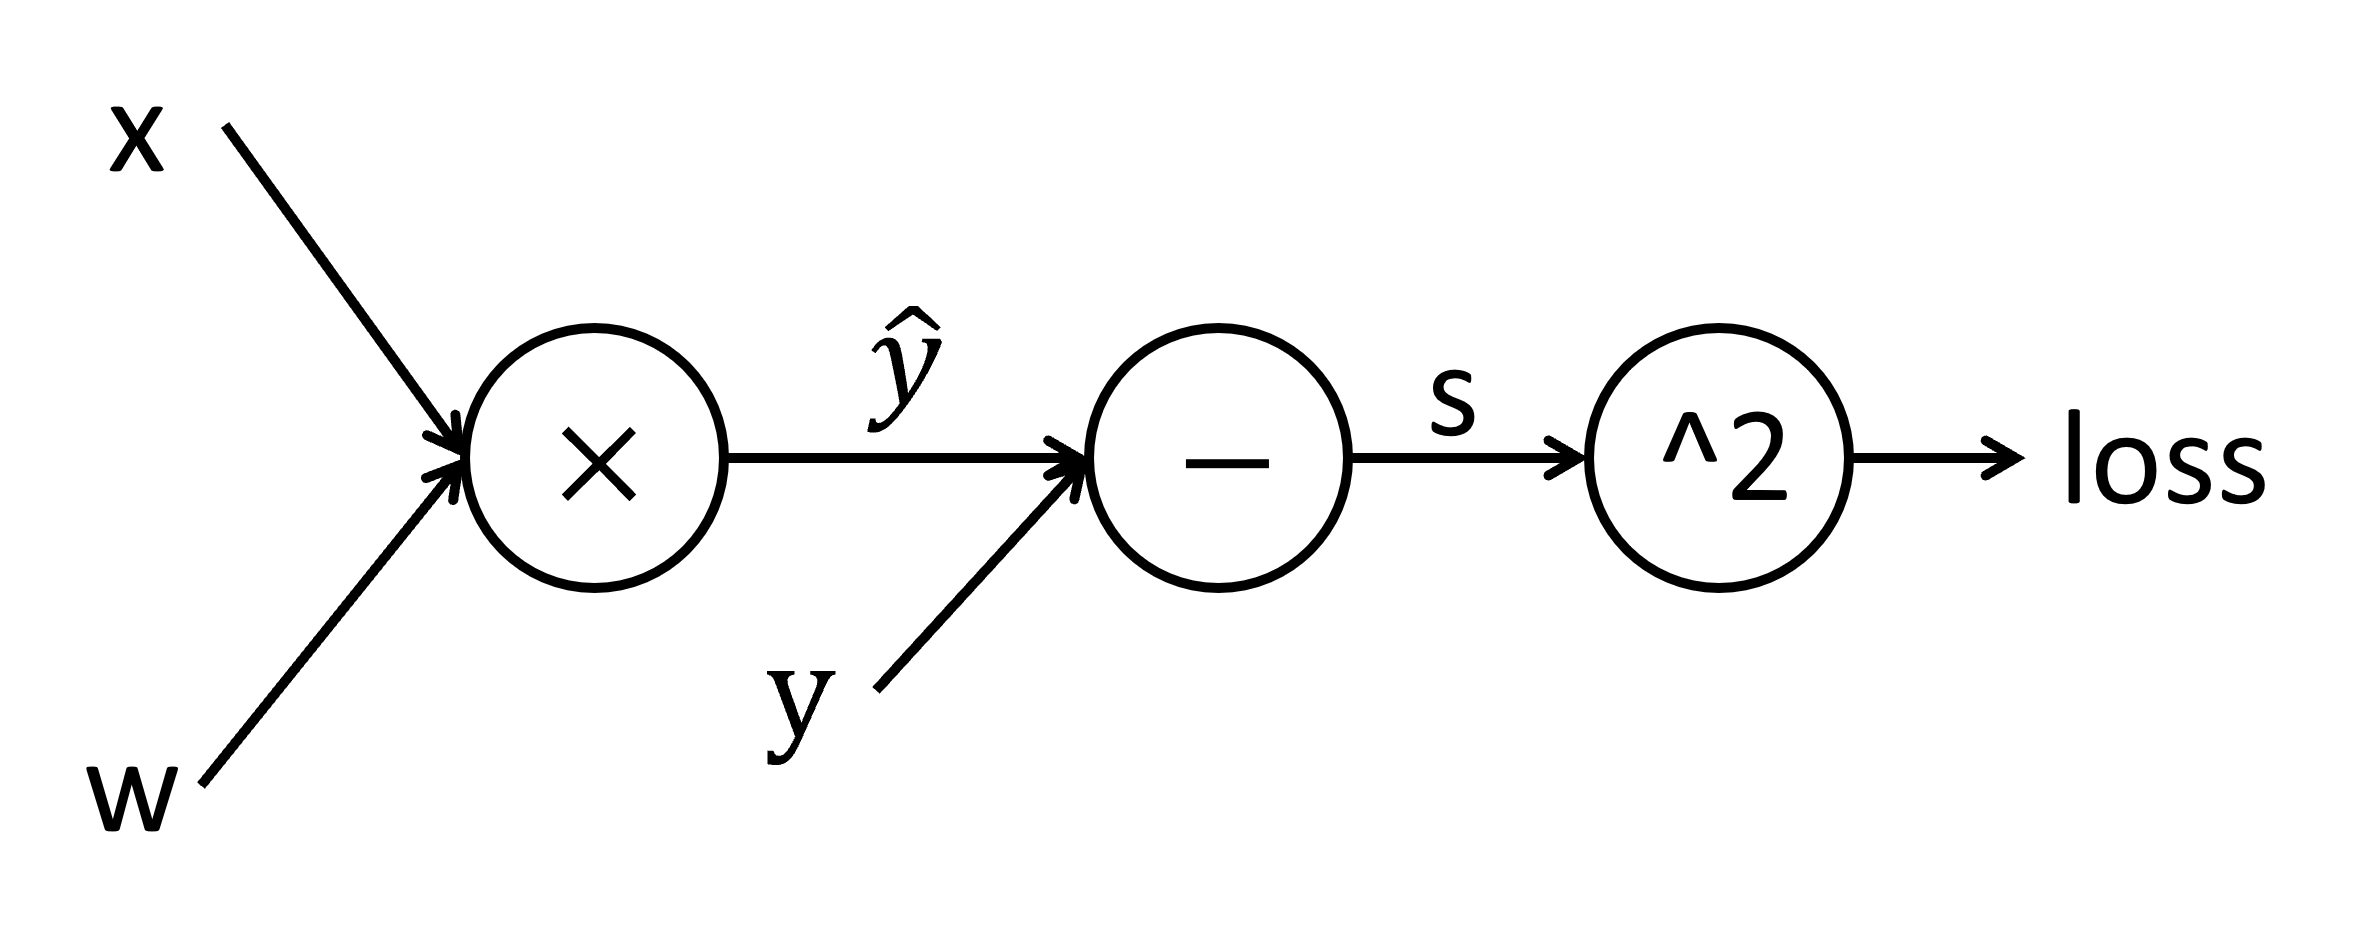

Step1: Compute the loss

  loss = $(wx-y)^2$ = $(1\times1-2)^2$ = 1

Step2: Compute local gradients
  
>   $\frac{\partial loss}{\partial s}$ = 2s

>   $\frac{\partial s}{\partial \hat y}$ = 1

>   $\frac{\partial \hat y}{\partial w}$ = x


Step3: Backward pass: Use Chain Rule $\frac{dLoss}{dWeights} $ = $2s\times1\times x$

Step4: Update weights
weight_new = weight - learning_rate $\times$ $\frac{dLoss}{dWeights} $


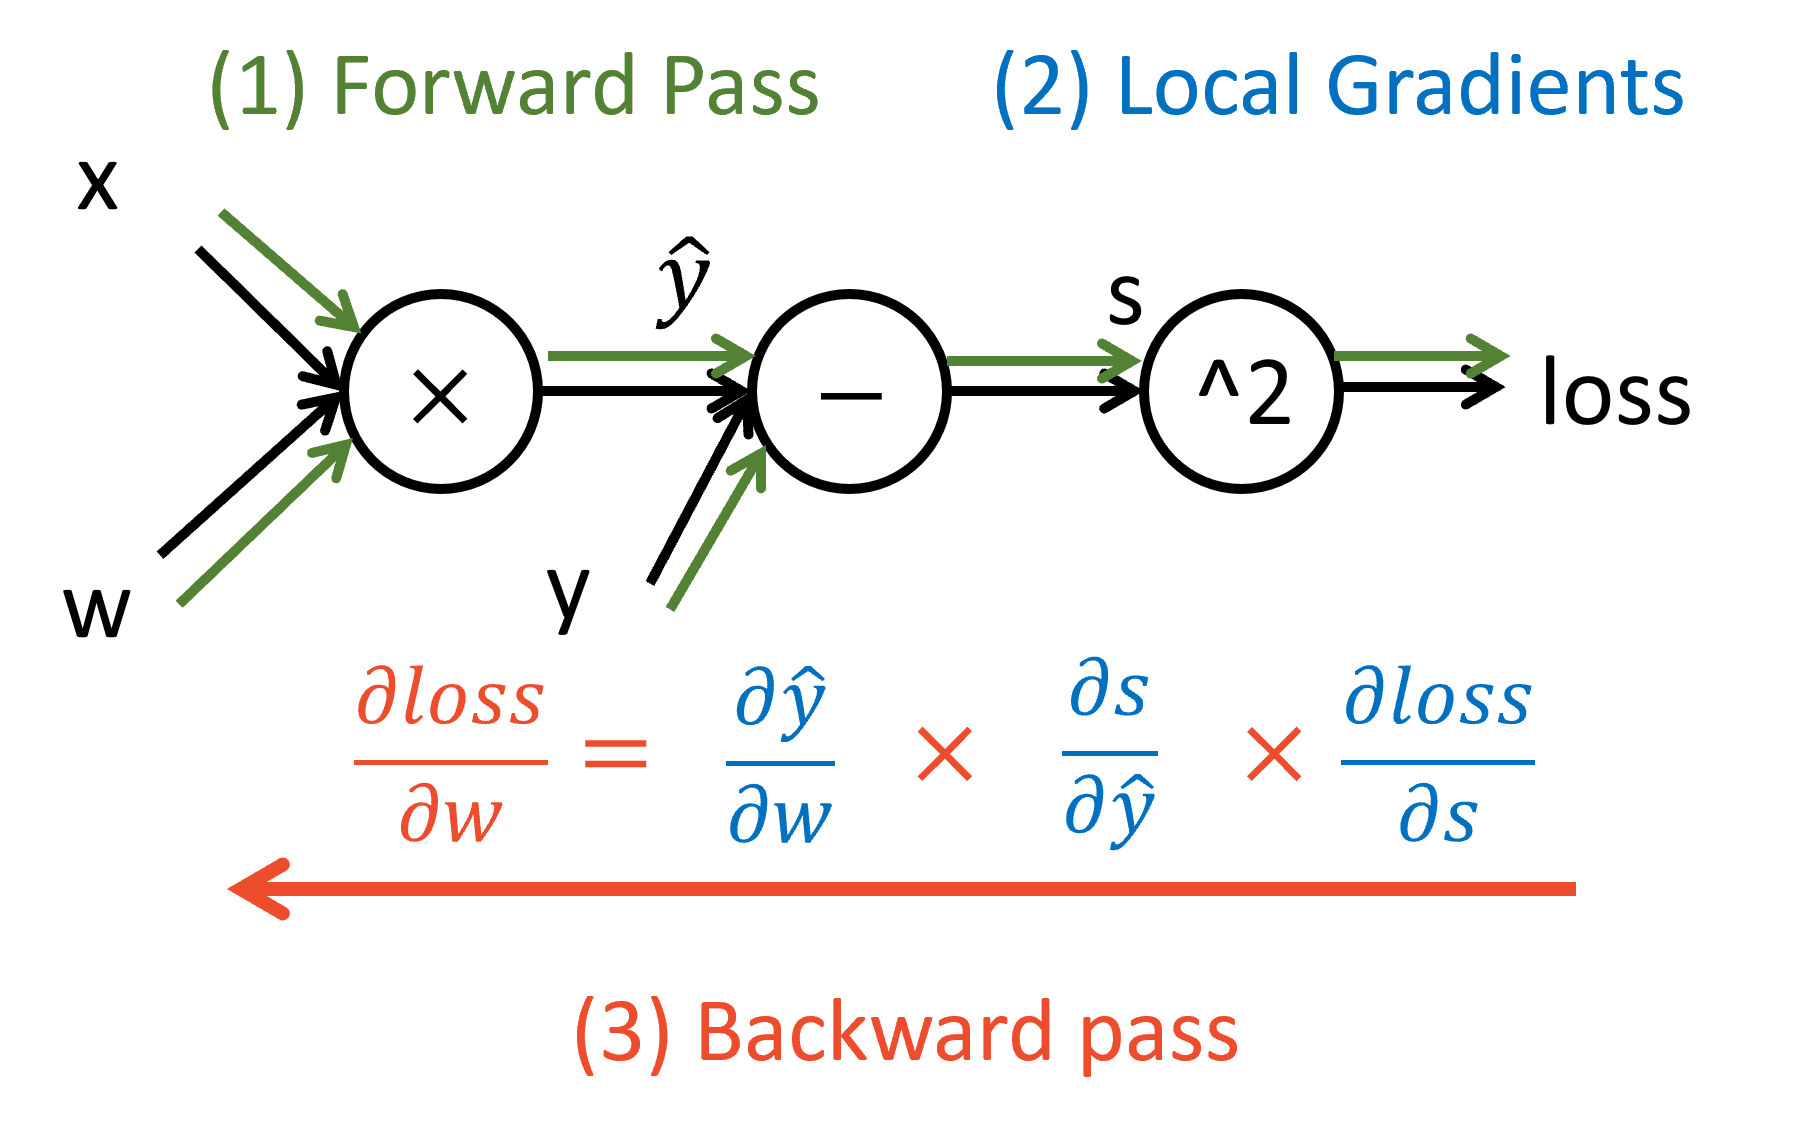

In [ ]:
import torch

x = torch.tensor(1.0)
y = torch.tensor(2.0)

# This is the parameter we want to optimize -> requires_grad=True
w = torch.tensor(1.0, requires_grad=True)
# Initialize w

#Step1: forward pass to compute loss
y_predicted = w * x
#define y_predicted
loss = (y_predicted - y)**2
#define loss function
print(loss)

#Step2 & Step3: backward pass to compute gradient dLoss/dw
loss.backward()
print(w.grad)

# update weights
# next forward and backward pass...

# continue optimizing:
# Step4: update weights, this operation should not be part of the computational graph
with torch.no_grad():
    w -= 0.01 * w.grad
# don't forget to zero the gradients
w.grad.zero_()

# next forward and backward pass...

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


tensor(0.)

Repeat four steps until find weights that meet the conditions

**Example** (home study)
--------------------
Assume we have $x$ = {1, 2, 3, 4} and $y$ = {2, 4, 6, 8} and we also know $y = wx$. Please find the weights by using **BP** and predict the value of $y$ when $x$ = 5.

Do it by yourself
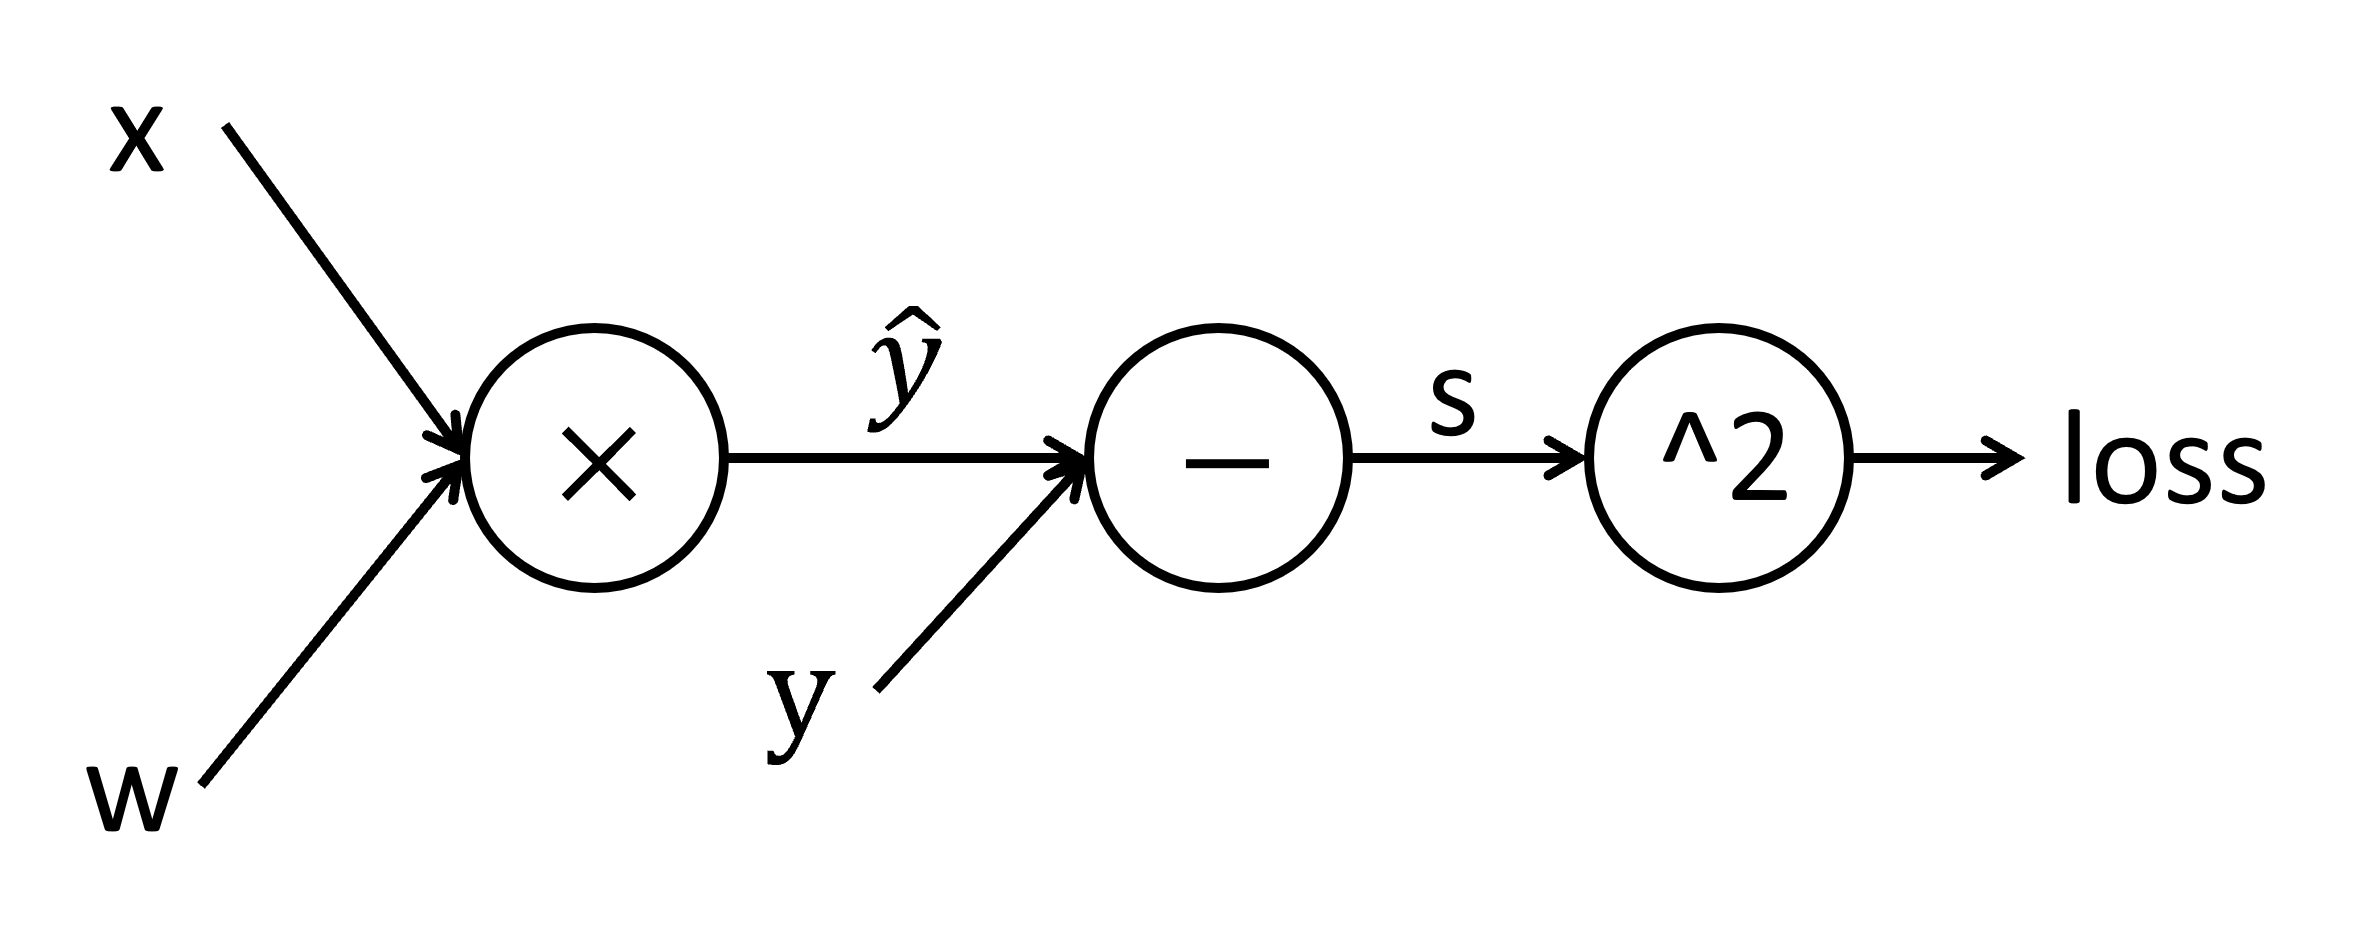

In [ ]:
# here : f = 2 * x
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model output
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

print(f'Prediction before training: f(5) = {forward(5).item():.3f}')

# Training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    # predict = forward pass
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    #w.data = w.data - learning_rate * w.grad
    with torch.no_grad():
        w -= learning_rate * w.grad
    
    # zero the gradients after updating
    w.grad.zero_()

    if epoch % 10 == 0:
        print(f'epoch {epoch+1}: w = {w.item():.3f}, loss = {l.item():.8f}')

print(f'Prediction after training: f(5) = {forward(5).item():.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


**Summary**
---------------------
Prediction: Manually

Gradients Computation: Autograd

Loss Computation: Manually

Parameter updates: Manually

Gradient descent: Manually

**Next Session:**

Prediction: Pytorch Model

Gradients Computation: Autograd

Loss Computation: Pytorch Loss

Parameter updates: Pytorch Optimize


**Datasets**
------------------




PyTorch provides two data primitives: ``torch.utils.data.DataLoader`` and ``torch.utils.data.Dataset``
that allow to use **pre-loaded datasets** as well as **your own data**.

``Dataset`` stores the samples and their corresponding labels, and ``DataLoader`` wraps an iterable around
the ``Dataset`` to enable easy access to the samples.

PyTorch domain libraries provide a number of pre-loaded datasets.

[Image Datasets](https://pytorch.org/vision/stable/datasets.html), [Text Datasets](https://pytorch.org/text/stable/datasets.html), [Audio Datasets](https://pytorch.org/audio/stable/datasets.html)




Loading a Dataset
-------------------

Here is an example of how to load the [Fashion-MNIST ](https://research.zalando.com/project/fashion_mnist/fashion_mnist/) dataset from TorchVision.

Fashion-MNIST is a dataset of Zalando’s article images consisting of 60,000 training examples and 10,000 test examples.
Each example comprises a 28×28 grayscale image and an associated label from one of 10 classes.

We load the [Fashion-MNIST ](https://research.zalando.com/project/fashion_mnist/fashion_mnist/) with the following parameters:
 - ``root`` is the path where the train/test data is stored,
 - ``train`` specifies training or test dataset,
 - ``download=True`` downloads the data from the internet if it's not available at ``root``.
 - ``transform`` and ``target_transform`` specify the feature and label transformations



In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Iterating and Visualizing the Dataset
-----------------

We can index ``Datasets`` manually like a list: ``training_data[index]``.
We use ``matplotlib`` to visualize some samples in our training data.



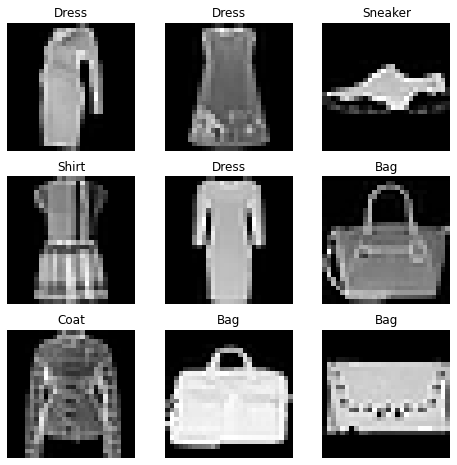

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item() #Returns a tensor filled with random integers generated uniformly between 0 and len(training_data).
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

--------------




Creating a Custom Dataset for your files
---------------------------------------------------

A custom Dataset class must implement three functions: `__init__`, `__len__`, and `__getitem__`.
Take a look at this implementation; the FashionMNIST images are stored
in a directory ``img_dir``, and their labels are stored separately in a CSV file ``annotations_file``.

In the next sections, we'll break down what's happening in each of these functions.



In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

$__init__$
----------------------

The __init__ function is run once when instantiating the Dataset object. We initialize
the directory containing the images, the annotations file, and both transforms (covered
in more detail in the next section).

The labels.csv file looks like:

    tshirt1.jpg, 0
    tshirt2.jpg, 0
    ......
    ankleboot999.jpg, 9



In [ ]:
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label'])
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

$__len__$
-----------------------------

The __len__ function returns the number of samples in our dataset.

Example:



In [ ]:
def __len__(self):
    return len(self.img_labels)

$__getitem__$
------------------------------------

The __getitem__ function loads and returns a sample from the dataset at the given index ``idx``.Based on the index, it identifies the image's location on disk.

 ``read_image``: convert the image to a tensor, 
 
 ``self.img_labels``: find the corresponding label from the csv data.

 ``self.transform`` and ``self.target_transform``: calls the transform functions on them (if applicable), 
 

In [ ]:
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label

--------------




**DataLoaders**
-------------------------------------------------

In [ ]:
'''
# training loop
for epoch in range(num_epochs):
    # loop over all batches
    for i in range(total_batches):
        batch_x, batch_y = ...
'''
# Basic concepts during training loop
# epoch = one forward and backward pass of ALL training samples
# batch_size = number of training samples used in one forward/backward pass
# number of iterations = number of passes, each pass (forward+backward) using [batch_size] number of sampes


# e.g : 100 samples, batch_size=20,
# The algorithm takes the first 20 samples from the training dataset and trains the network. 
# Next, it takes the second 20 samples and trains the network again. 
# We can keep doing this procedure until we have propagated all samples through of the network, which means we complete one EPOCH. 
# During each epoch, it has 100/20=5 iterations.


DataLoader can do the batch computation for us.

 ``shuffle ``: shuffle data, good for training. [link text](https://pytorch.org/docs/stable/data.html#data-loading-order-and-sample)

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Iterate through the DataLoader
--------------------------

We have loaded that dataset into the ``DataLoader`` and can iterate through the dataset as needed.
Each iteration below returns a batch of ``train_features`` and ``train_labels`` (containing ``batch_size=64`` features and labels respectively).


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


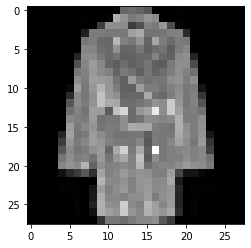

Label: 4


In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
# iter: change train_dataloader to an iterator; next: get the first iteration

print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
# Visualize the first iteration sample

print(f"Label: {label}")
#labels_map = {0: "T-Shirt", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot",}

--------------




[torch.utils.data API](https://pytorch.org/docs/stable/data.html)




Transforms
===================

Data does not always come in its final processed form that is required for
training machine learning algorithms. We use **transforms** to perform some
manipulation of the data and make it suitable for training.

All TorchVision datasets have two parameters -``transform`` to modify the features and
``target_transform`` to modify the labels - that accept callables containing the transformation logic.
The[`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) module offers
several commonly-used transforms out of the box.

The FashionMNIST features are in PIL Image format, and the labels are integers.
For training, we need the features as normalized tensors, and the labels as one-hot encoded tensors.
To make these transformations, we use ``ToTensor`` and ``Lambda``.



In [ ]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    # ToTensor converts a PIL image or NumPy ndarray into a FloatTensor. and scales the image's pixel intensity values in the range [0., 1.]
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
    # turn the integer into a one-hot encoded tensor
    # first create a zero tensor of size 10 (the number of labels in our dataset) 
    # use scatter_ to assign a value=1 on the index as given by the label y.
)

--------------




[torchvision.transforms API ](https://pytorch.org/vision/stable/transforms.html)